In [1]:
import pandas as pd
treatment_data = [
    ('EK_207', 1, 'ketone'),
    ('EK_207', 2, 'placebo'),
    ('EK_240', 1, 'placebo'),
    ('EK_240', 2, 'ketone'),
    ('EK_259', 1, 'placebo'),
    ('EK_259', 2, 'ketone'),
    ('EK_352', 1, 'ketone'),
    ('EK_352', 2, 'placebo'),
    ('EK_382', 1, 'ketone'),
    ('EK_382', 2, 'placebo'),
    ('EK_401', 1, 'placebo'),
    ('EK_401', 2, 'ketone'),
    ('EK_478', 1, 'ketone'),
    ('EK_478', 2, 'placebo'),
    ('EK_490', 1, 'ketone'),
    ('EK_490', 2, 'placebo'),
    ('EK_497', 1, 'ketone'),
    ('EK_497', 2, 'placebo'),
    ('EK_578', 1, 'ketone'),
    ('EK_578', 2, 'placebo'),
    ('EK_663', 1, 'placebo'),
    ('EK_663', 2, 'ketone'),
    ('EK_716', 1, 'ketone'),
    ('EK_716', 2, 'placebo'),
    ('EK_753', 1, 'placebo'),
    ('EK_753', 2, 'ketone'),
    ('EK_845', 1, 'placebo'),
    ('EK_845', 2, 'ketone'),
    ('EK_851', 1, 'placebo'),
    ('EK_851', 2, 'ketone'),
    ('EK_855', 1, 'placebo'),
    ('EK_855', 2, 'ketone'),
    ('EK_879', 1, 'placebo'),
    ('EK_879', 2, 'ketone'),
    ('EK_882', 1, 'ketone'),
    ('EK_882', 2, 'placebo'),
    ('EK_945', 1, 'placebo'),
    ('EK_945', 2, 'ketone')
]

# Create DataFrame from treatment_data
columns = ['participant_id', 'session', 'drink']
treatment_df = pd.DataFrame(treatment_data, columns=columns)

[Participant Trajectories - Placebo Condition] Successfully loaded 19 trajectories.
[Participant Trajectories - Ketone Condition] Successfully loaded 19 trajectories.


C:\Users\lal\AppData\Local\Temp\ipykernel_2644\3454469612.py:171: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.95, 0.95])  # leave room on right for legend


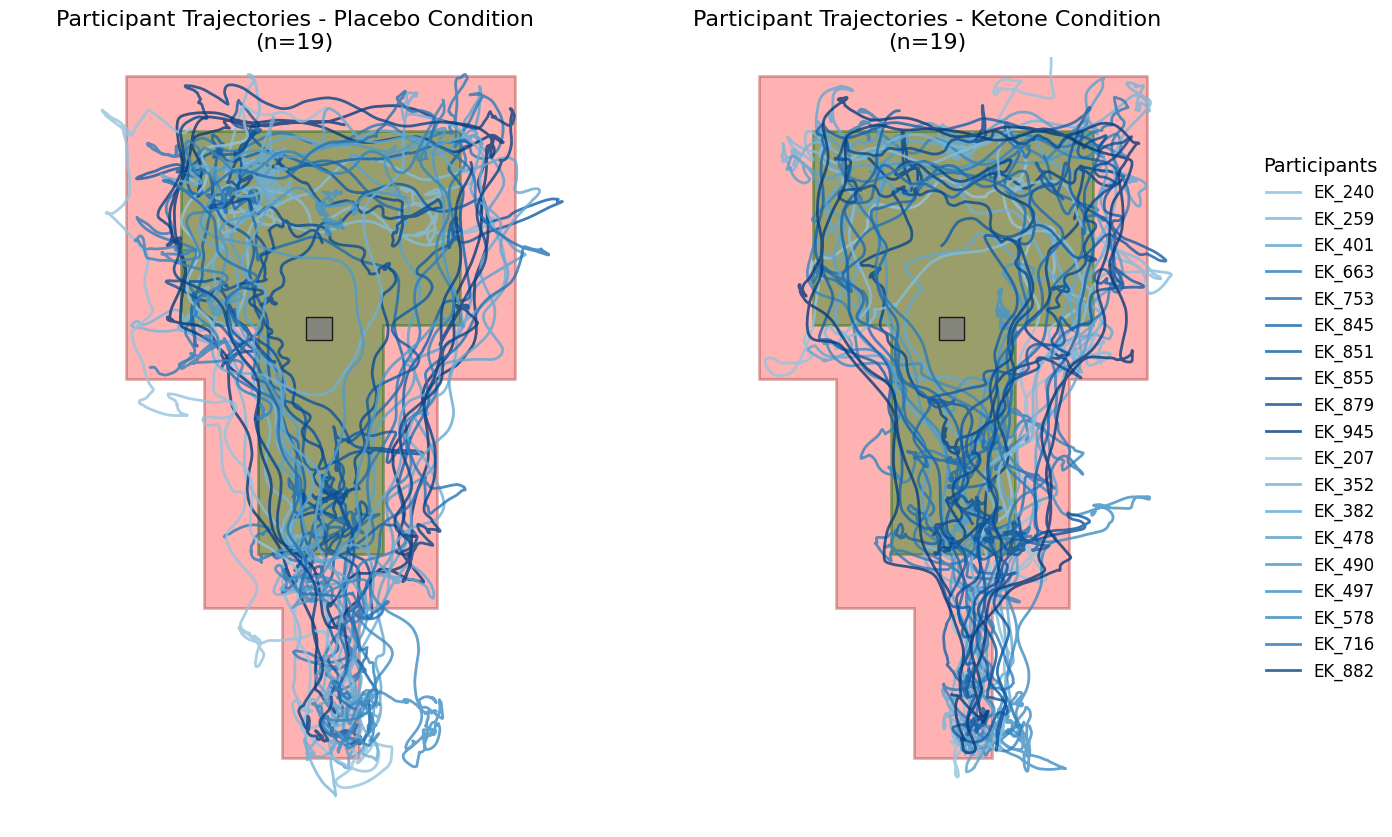

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import glob
from datetime import datetime, timedelta

# --- Coordinates ---
coords = {
    "pillar": [
        (-6.21, 5.14),
        (-6.21, 4.96),
        (-6.41, 4.96),
        (-6.41, 5.14)
    ],
    'platform': {
        'outer': [
            (-6.00, 1.73), (-6.60, 1.73), (-6.60, 2.89), (-7.20, 2.89),
            (-7.20, 4.66), (-7.80, 4.66), (-7.80, 7.00), (-4.80, 7.00),
            (-4.80, 4.66), (-5.40, 4.66), (-5.40, 2.89), (-6.00, 2.89)
        ],
        'inner': [
            (-6.78, 3.31), (-6.78, 5.08), (-7.38, 5.08),
            (-7.38, 6.58), (-5.22, 6.58), (-5.22, 5.08),
            (-5.82, 5.08), (-5.82, 3.31)
        ]
    }
}

# --- Skip participants ---
skip_participants = [
    'EK_260', 'EK_303', 'EK_418', 'EK_424', 'EK_645', 
    'EK_648', 'EK_711', 'EK_715', 'EK_795', 'EK_951', 
    'EK_963', 'EK_993'
]

# --- Base directory ---
base_dir = r'D:\vr-pipeline\data\RAW1'

# Create a lookup dictionary for treatment information
treatment_info = {}
for _, row in treatment_df.iterrows():
    participant_id = row['participant_id']
    session = f"S00{int(row['session'])}"  # Convert to "S001" or "S002" format
    drink = row['drink']
    
    if participant_id not in treatment_info:
        treatment_info[participant_id] = {}
    
    treatment_info[participant_id][session] = drink

# --- Create figure ---
fig, axes = plt.subplots(1, 2, figsize=(16, 10), gridspec_kw={'wspace': 0.04})
titles = ['Participant Trajectories - Placebo Condition', 
          'Participant Trajectories - Ketone Condition']

# --- Prepare data structures for each treatment ---
placebo_data = []  # Will store (file_path, participant_id, session)
ketone_data = []   # Will store (file_path, participant_id, session)

# --- Find all files and sort by treatment ---
for session in ['S001', 'S002']:
    pattern = os.path.join(base_dir, '*', session, 'trackers_rotated', 'camera_movement_T011.csv')
    file_paths = glob.glob(pattern)
    
    for file_path in file_paths:
        parts = file_path.split(os.sep)
        participant_id = parts[parts.index('RAW1') + 1]
        
        if participant_id not in skip_participants and participant_id in treatment_info:
            if session in treatment_info[participant_id]:
                drink = treatment_info[participant_id][session]
                if drink == 'placebo':
                    placebo_data.append((file_path, participant_id, session))
                elif drink == 'ketone':
                    ketone_data.append((file_path, participant_id, session))

# --- Get all unique participants for consistent coloring ---
all_participants = sorted(list(set([pid for _, pid, _ in placebo_data + ketone_data])))
participant_to_idx = {pid: i for i, pid in enumerate(all_participants)}

# --- Create color map for consistent coloring ---
n_unique_participants = len(all_participants)
blues = plt.cm.Blues(np.linspace(0.4, 0.95, n_unique_participants))
participant_colors = {pid: blues[i] for i, pid in enumerate(all_participants)}

# --- Collect legend handles ---
legend_handles = {}

# --- Plot each treatment group ---
for idx, (treatment_data, title) in enumerate(zip([placebo_data, ketone_data], titles)):
    ax = axes[idx]
    
    # --- Background patches ---
    outer_polygon = patches.Polygon(coords['platform']['outer'], 
                                   fill=True, facecolor='red', alpha=0.3,
                                   edgecolor='darkred', linewidth=2)
    ax.add_patch(outer_polygon)

    inner_polygon = patches.Polygon(coords['platform']['inner'], 
                                   fill=True, facecolor='green', alpha=0.4,
                                   edgecolor='darkgreen', linewidth=2)
    ax.add_patch(inner_polygon)

    pillar_polygon = patches.Polygon(coords['pillar'], 
                                    fill=True, facecolor='gray', 
                                    edgecolor='black', linewidth=1, alpha=0.8)
    ax.add_patch(pillar_polygon)
    
    # --- Plot trajectories ---
    successful_loads = 0
    for file_path, participant_id, session in treatment_data:
        try:
            df = pd.read_csv(file_path)
            df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%Y %H:%M:%S')

            start_time = df['timestamp'].iloc[0]
            time_window_start = start_time + timedelta(seconds=30)
            time_window_end = start_time + timedelta(seconds=120)

            filtered_df = df[(df['timestamp'] >= time_window_start) & 
                             (df['timestamp'] <= time_window_end)]

            if filtered_df.empty:
                print(f"[{title}] No data in time window for {participant_id} ({session})")
                continue

            x_coords = filtered_df['pos_x'].values
            z_coords = filtered_df['pos_z'].values

            # Use consistent color for each participant
            color = participant_colors[participant_id]
            
            line, = ax.plot(x_coords, z_coords, 
                          color=color, linewidth=2, alpha=0.8, zorder=10, 
                          label=participant_id)
            
            # Store handle for legend
            if participant_id not in legend_handles:
                legend_handles[participant_id] = line
                
            successful_loads += 1

        except Exception as e:
            print(f"[{title}] Error loading {participant_id} ({session}): {str(e)}")

    print(f"[{title}] Successfully loaded {successful_loads} trajectories.")
    
    # --- Axis styling ---
    ax.set_xlim(-8.7, -4.3)
    ax.set_ylim(1.2, 7.15)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # --- Title ---
    ax.set_title(f'{title}\n(n={successful_loads})', fontsize=16)

# --- Shared legend at right with just participant IDs ---
fig.legend(legend_handles.values(), legend_handles.keys(),
           title="Participants", fontsize=12, title_fontsize=14,
           loc='center right',
           frameon=False)

# --- Final layout ---
plt.tight_layout(rect=[0, 0, 0.95, 0.95])  # leave room on right for legend
plt.savefig('trajectory_by_condition.png', dpi=600, bbox_inches='tight')
plt.show()